## Task 4: To explore Decision Tree Algorithm

### Name: Gaurav Pore
#### Task: For the given dataset, create the Decision Tree classifier and visualize it graphically.

In [128]:
#Importing libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [129]:
#Loading the dataset
df= pd.read_csv('Iris.csv')
print(df.head(5))
X = df.iloc[:, 1:5].values
y = df.iloc[:, -1].values

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


### Data Preprocessing 

In [130]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [131]:
# column names
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [133]:
print ("Shape of target data:",y.shape)

Shape of target data: (150,)


In [134]:
#Checking for null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Data Visualization 

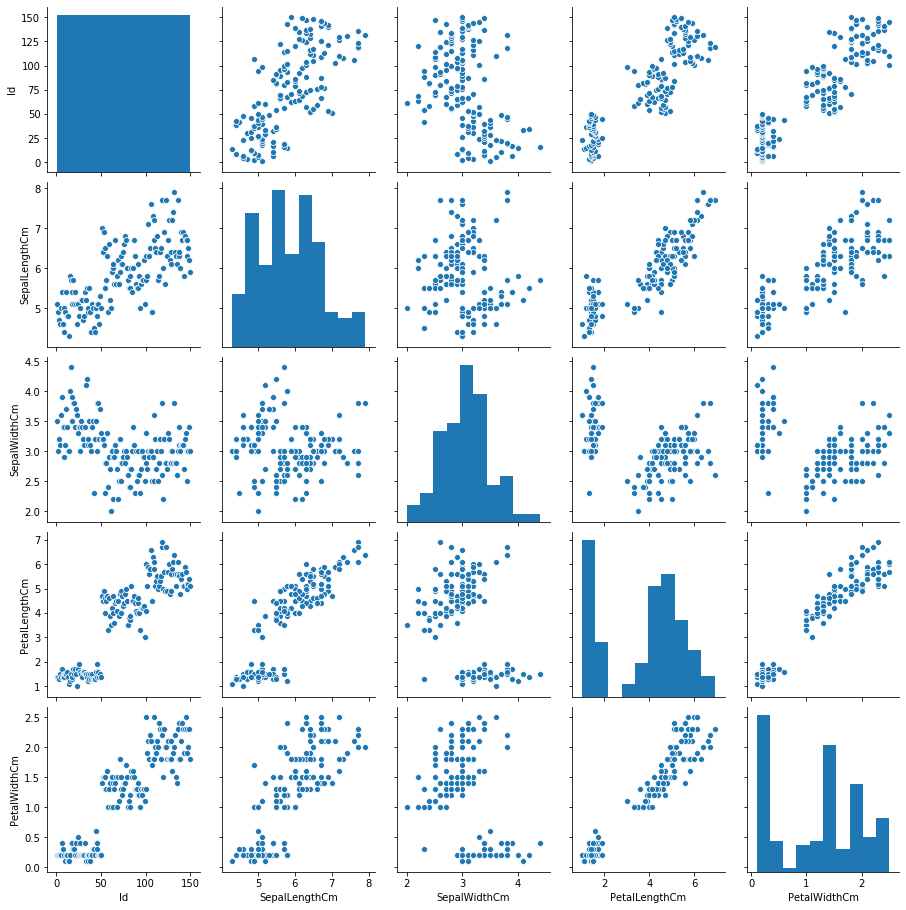

In [135]:
sns.pairplot(df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BCA04BD688>,
      dtype=object)

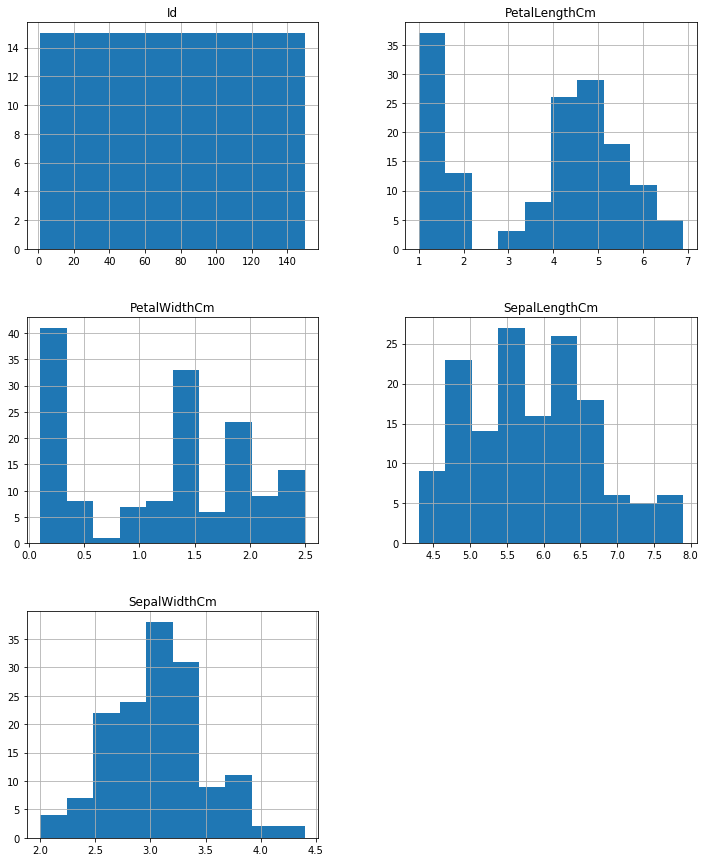

In [136]:
df.hist(figsize = (12,15))

### Creating classifier 

In [137]:
# Defining the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X,y)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


### Train-Test split

In [138]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Model training 

In [139]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [140]:
y_pred = classifier.predict(X_test) #predicting results on test set

In [141]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
data.head()

,Actual,Predicted
0,Iris-virginica,Iris-virginica
1,Iris-versicolor,Iris-versicolor
2,Iris-setosa,Iris-setosa
3,Iris-virginica,Iris-virginica
4,Iris-setosa,Iris-setosa


In [142]:
data.tail()

,Actual,Predicted
33,Iris-virginica,Iris-virginica
34,Iris-virginica,Iris-virginica
35,Iris-versicolor,Iris-versicolor
36,Iris-setosa,Iris-setosa
37,Iris-versicolor,Iris-virginica


### Model Evaluation 

In [143]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


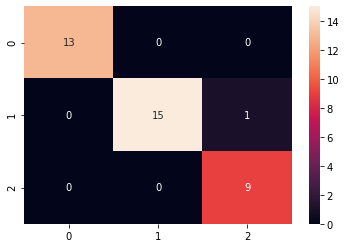

In [144]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [145]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



In [146]:
from sklearn import metrics
print("The accuracy of the Decision Tree is","{:.3f}".format(metrics.accuracy_score(y_pred,y_test)))

The accuracy of the Decision Tree is 0.974


## Visualizing Tree

In [147]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

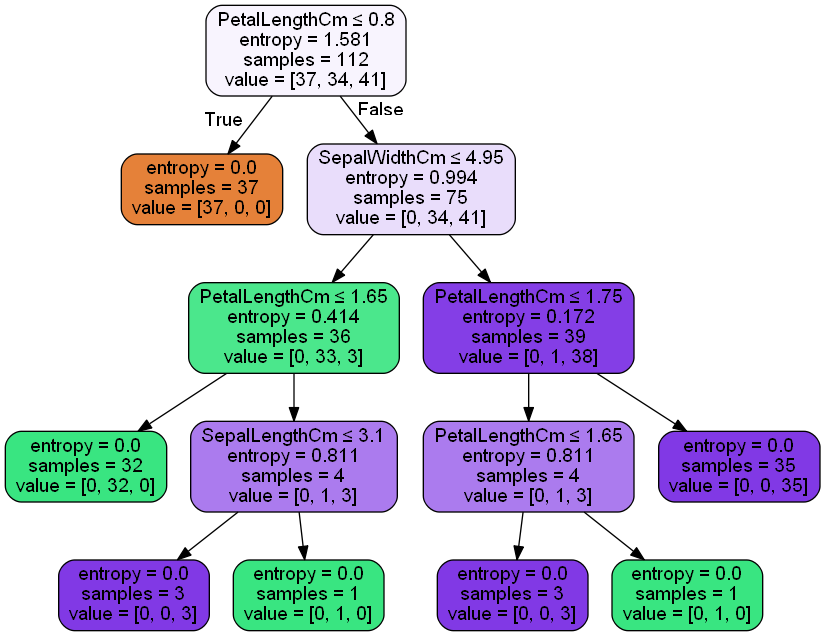

In [149]:
dot_data = StringIO()

import matplotlib.pyplot as plt
from sklearn import tree

#feature_names=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
class_names=['iris-setosa', 'iris-versicolor', 'iris-virginica']
features_names = list(df.columns[:4])
export_graphviz(classifier, out_file=dot_data, feature_names=features_names,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
